In [78]:
! pip install scikit-learn
import pandas as pd
import sys
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt



In [79]:
df = pd.read_csv('foodDeliveryTimes.csv')
#preview of the database
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


<Axes: >

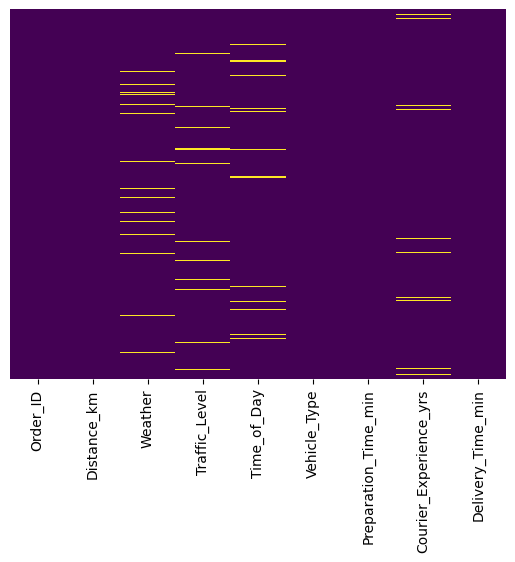

In [80]:
# print(df.shape)
# print(df.dropna().shape)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

- Above heat map shows the heatmap of features that have empty values
- The features that have missing values are Weather, Traffic_level, Time_Of_Day, Courier_Experience_yrs

In [81]:
# Shape of the db after dropping the rows with missing values
print(df.dropna().shape)

(883, 9)


- Thus, deleting all the rows with missing values would not be a good tactic because it would delete almost ~ 1/10th of the database
- Therefore for all the string (Non - Numeric) features we will fill the missing values as the modal value of that feature and for Courier_Experience_yrs we fill the missing values with the mean value.


In [82]:
mode_weather = df['Weather'].mode()[0]
mode_traffic_level = df['Traffic_Level'].mode()[0]
mode_time_of_day = df['Time_of_Day'].mode()[0]
mean_courier_experience = df['Courier_Experience_yrs'].mean()

print(f"Mode of Weather: {mode_weather}")
print(f"Mode of Traffic Level: {mode_traffic_level}")
print(f"Mode of Time Of Day: {mode_time_of_day}")
print(f"Mean of Courier Experience: {mean_courier_experience} || Rounded: {round(mean_courier_experience)}")

Mode of Weather: Clear
Mode of Traffic Level: Medium
Mode of Time Of Day: Morning
Mean of Courier Experience: 4.579381443298969 || Rounded: 5


In [83]:
#respectively filling the missing values
df['Weather'].fillna(mode_weather, inplace=True)
df['Traffic_Level'].fillna(mode_traffic_level, inplace=True)
df['Time_of_Day'].fillna(mode_time_of_day, inplace=True)
df['Courier_Experience_yrs'].fillna(round(mean_courier_experience), inplace=True)

df.isnull().sum()

C:\Users\choud\AppData\Local\Temp\ipykernel_24160\834208521.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna(mode_weather, inplace=True)
C:\Users\choud\AppData\Local\Temp\ipykernel_24160\834208521.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

- Below is the code to encode the categorical variables in the dataset

In [84]:


# Create label encoders for each categorical column
le_weather = LabelEncoder()
le_traffic = LabelEncoder()
le_time = LabelEncoder()
le_vehicle = LabelEncoder()

# Perform label encoding
df['Weather_encoded'] = le_weather.fit_transform(df['Weather'])
df['Traffic_Level_encoded'] = le_traffic.fit_transform(df['Traffic_Level']) 
df['Time_of_Day_encoded'] = le_time.fit_transform(df['Time_of_Day'])
df['Vehicle_Type_encoded'] = le_vehicle.fit_transform(df['Vehicle_Type'])

# Print mapping for reference
print("Weather mapping:", dict(zip(le_weather.classes_, le_weather.transform(le_weather.classes_))))
print("Traffic Level mapping:", dict(zip(le_traffic.classes_, le_traffic.transform(le_traffic.classes_))))
print("Time of Day mapping:", dict(zip(le_time.classes_, le_time.transform(le_time.classes_))))
print("Vehicle Type mapping:", dict(zip(le_vehicle.classes_, le_vehicle.transform(le_vehicle.classes_))))

Weather mapping: {'Clear': np.int64(0), 'Foggy': np.int64(1), 'Rainy': np.int64(2), 'Snowy': np.int64(3), 'Windy': np.int64(4)}
Traffic Level mapping: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Time of Day mapping: {'Afternoon': np.int64(0), 'Evening': np.int64(1), 'Morning': np.int64(2), 'Night': np.int64(3)}
Vehicle Type mapping: {'Bike': np.int64(0), 'Car': np.int64(1), 'Scooter': np.int64(2)}


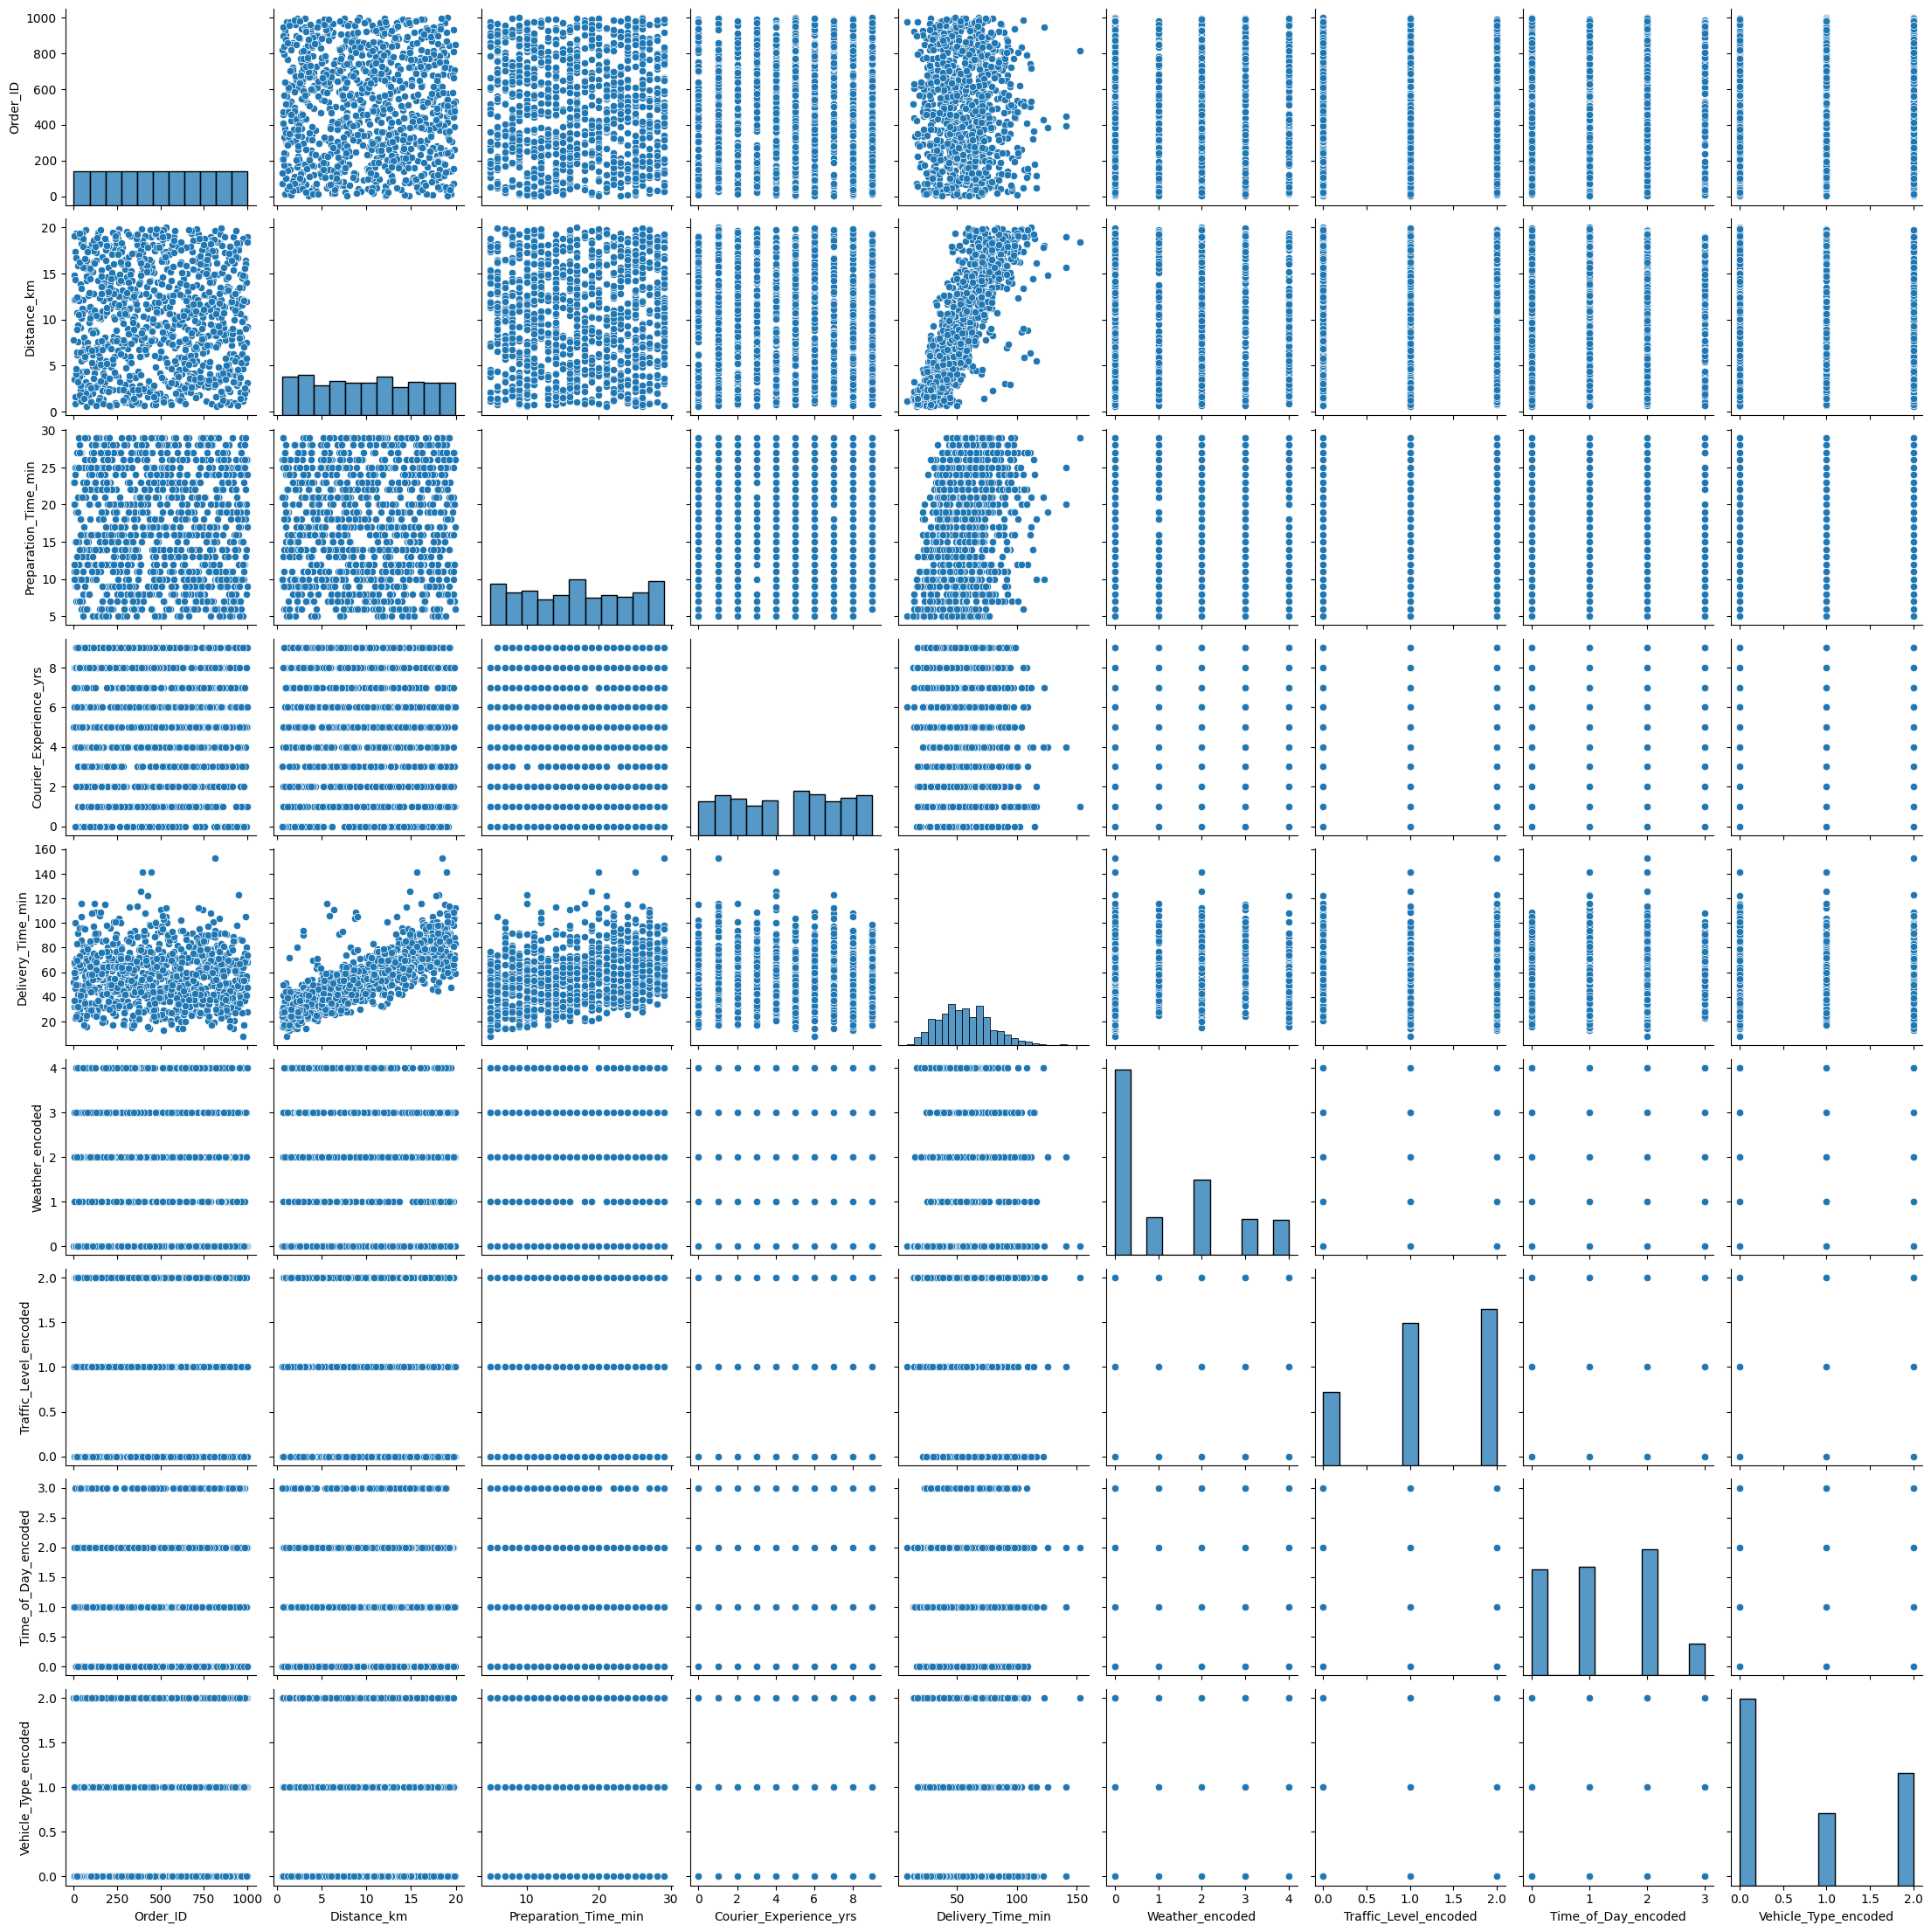

In [85]:
sns.pairplot(df)

C:\Users\choud\AppData\Local\Temp\ipykernel_24160\8242142.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  plt.scatter(df['Distance_km'],df['Delivery_Time_min'], cmap='viridis', norm=norm, s=5)


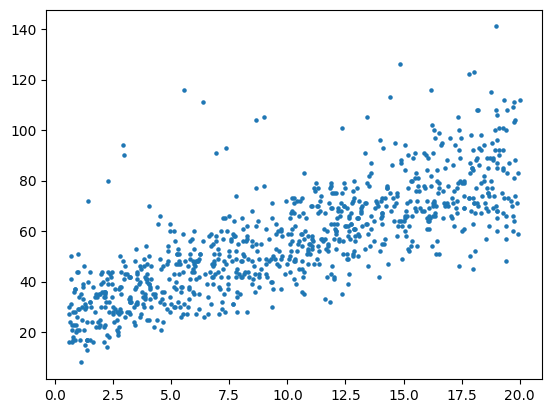

In [44]:
plt.scatter(df['Distance_km'],df['Delivery_Time_min'], cmap='viridis', norm=norm, s=5)


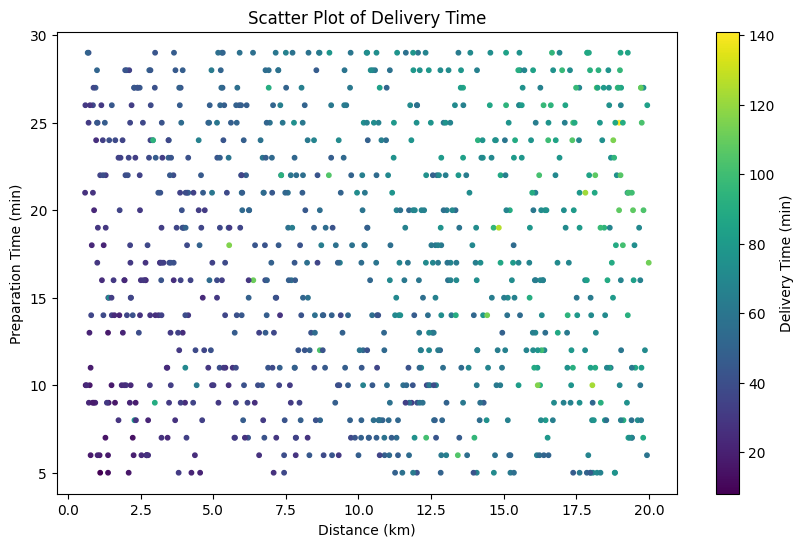

In [42]:
df = df.dropna()
norm = plt.Normalize(vmin=8, vmax=141)
# change the size to big
plt.figure(figsize=(10, 6))

plt.scatter(df['Distance_km'], df['Preparation_Time_min'], 
            c=df['Delivery_Time_min'], cmap='viridis', norm=norm, s=10)

# Add colorbar for reference
plt.colorbar(label="Delivery Time (min)")

# Labels and title
plt.xlabel("Distance (km)")
plt.ylabel("Preparation Time (min)")
plt.title("Scatter Plot of Delivery Time")

plt.show()


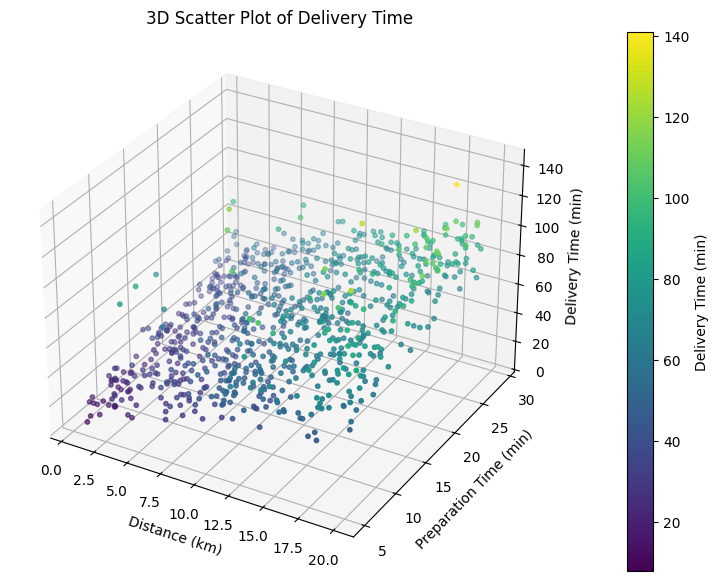

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Normalize Delivery_Time_min between 8 and 141
norm = plt.Normalize(vmin=8, vmax=141)

# Create figure and 3D axis
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(df['Distance_km'], df['Preparation_Time_min'], df['Delivery_Time_min'], 
                c=df['Delivery_Time_min'], cmap='viridis', norm=norm, s=10)

# Add colorbar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Delivery Time (min)")

# Labels and title
ax.set_xlabel("Distance (km)")
ax.set_ylabel("Preparation Time (min)")
ax.set_zlabel("Delivery Time (min)")
ax.set_title("3D Scatter Plot of Delivery Time")

plt.show()


In [ ]:
def compute_frequencies(csv_file):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Compute frequency counts for each column
    print("Column Value Frequencies:")
    for col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts().to_string())
        
def checkingNumberOfEmptyValuesInEachColumn(csv_file):
    df = pd.read_csv(csv_file)
    print("Number of empty values in each column:")
    print(df.isnull().sum())

def checkingRowsAndHowManyEmptyCellsTheyHave(csv_file):
    df = pd.read_csv(csv_file)
    # print("Number of empty values in each row:")
    # print(df.isnull().sum(axis=1))
    # Filter rows with at least one empty cell and print their empty cell count
    empty_rows = df.isnull().sum(axis=1)
    rows_with_empties = empty_rows[empty_rows > 0]
    if not rows_with_empties.empty:
        print("\nRows with empty cells:")
        print(rows_with_empties.to_string())
    else:
        print("\nNo rows contain empty cells")
        

def functionToCheckIfThereIsAnyRelationShipBetween2Columns(csv_file):
    df = pd.read_csv(csv_file)
    sns.pairplot(df)
    plt.show()

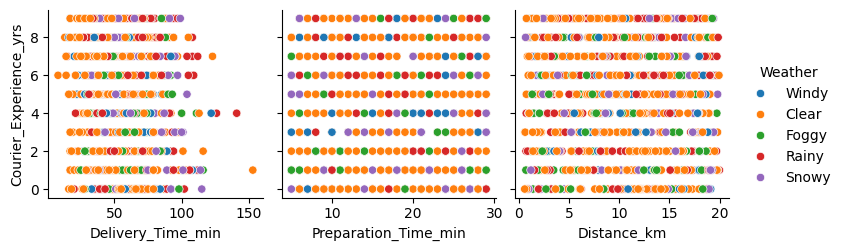

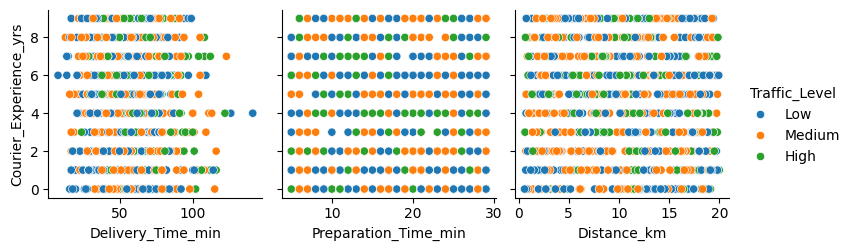

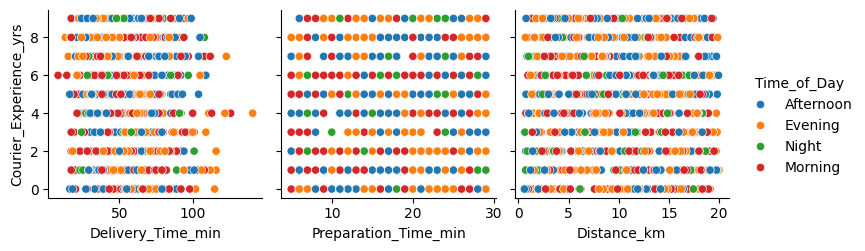

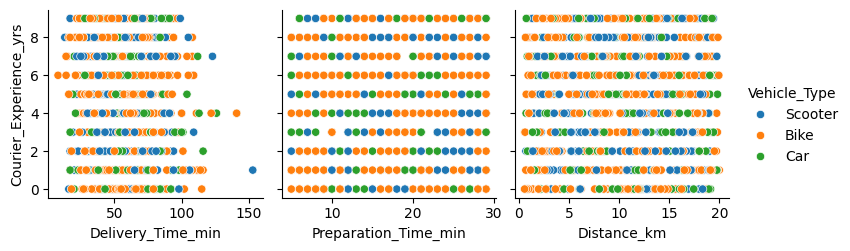

In [66]:
# sns.pairplot(df) 
#make pairplot between courier_experience_yrs and all other features
sns.pairplot(df, y_vars=['Courier_Experience_yrs'], x_vars=['Delivery_Time_min', 'Preparation_Time_min', 'Distance_km'], kind='scatter', hue='Weather')
sns.pairplot(df, y_vars=['Courier_Experience_yrs'], x_vars=['Delivery_Time_min', 'Preparation_Time_min', 'Distance_km'], kind='scatter', hue='Traffic_Level')
sns.pairplot(df, y_vars=['Courier_Experience_yrs'], x_vars=['Delivery_Time_min', 'Preparation_Time_min', 'Distance_km'], kind='scatter', hue='Time_of_Day')
sns.pairplot(df, y_vars=['Courier_Experience_yrs'], x_vars=['Delivery_Time_min', 'Preparation_Time_min', 'Distance_km'], kind='scatter', hue='Vehicle_Type')
plt.show()

In [ ]:
if __name__ == "__main__":
    if len(sys.argv) != 2:
        print("Usage: python script.py <csv_file>")
    else:
        with open('output.txt', 'w') as f:
            sys.stdout = f
            compute_frequencies(sys.argv[1])
            # checkingNumberOfEmptyValuesInEachColumn(sys.argv[1])
            # checkingRowsAndHowManyEmptyCellsTheyHave(sys.argv[1])
            sys.stdout = sys.__stdout__